In [3]:
import sys
sys.path.append('..')
import ImpedanceSynthesiser as imps
import numpy as np
import matplotlib.pyplot as pl
%matplotlib notebook

reload(imps)

<module 'ImpedanceSynthesiser' from '../ImpedanceSynthesiser.pyc'>

In [6]:
world = imps.AcousticWorld()

l0 = 1.0

rad0 = [0.02,.0075,.0035,.002,.001]

ducts = []


for rad in rad0:
    duct = imps.Duct(world=world,losses=True)
    duct.set_termination(imps.PerfectOpenEnd())
    duct.append_element(imps.StraightDuct(length=l0,radius=rad))
    ducts.append(duct)



<IPython.core.display.Javascript object>


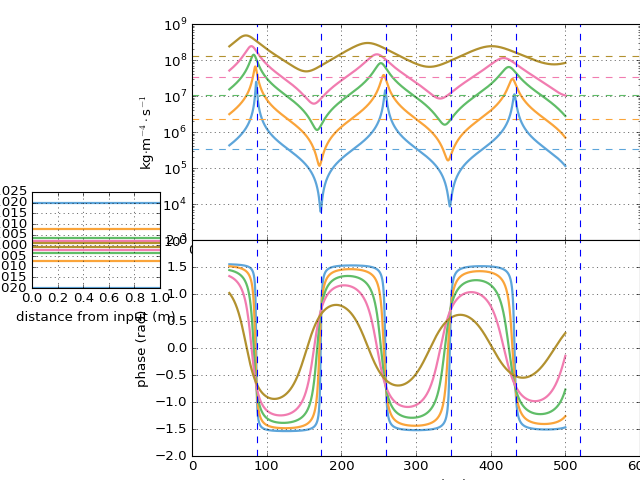

In [9]:
fvec = np.linspace(10,500,1000)

#fig,ax=pl.subplots(2,sharex=True)

ax = None
for duct in ducts:
    if ax is None:
        ax=duct.plot_report( fmax=max(fvec), npoints=2000)
    else:
        duct.plot_report(ax=ax, fmax=max(fvec), npoints=2000)
    
    ax[1].axhline((np.abs(duct.elements[0].get_characteristic_impedance())),
                  lw=1,ls='--',color=ax[0].lines[-1].get_color())

f=0
c=duct.speed_of_sound
while f < max(fvec):
    f+=c/(4*l0)
    ax[1].axvline(f,ls='--',lw=1)
    ax[2].axvline(f,ls='--',lw=1)

In [10]:
world.temperature

25.0